# Chronic Kidney Disease with ML algorithms

# Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes= True)

In [13]:
df = pd.read_csv('kidney_disease.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


# Exploratory Data Analysis

<Axes: xlabel='Htn', ylabel='count'>

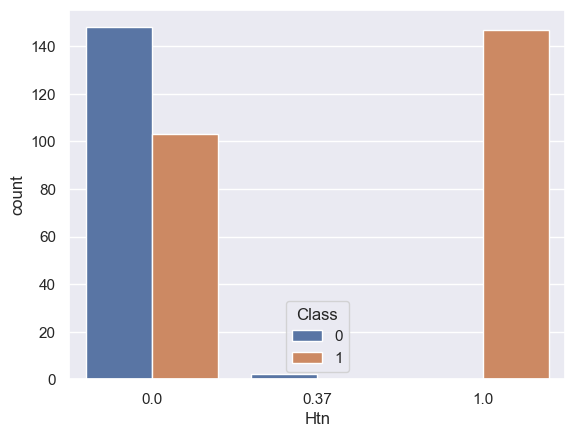

In [14]:
sns.countplot(data=df, x='Htn', hue='Class')

<Axes: xlabel='Rbc', ylabel='count'>

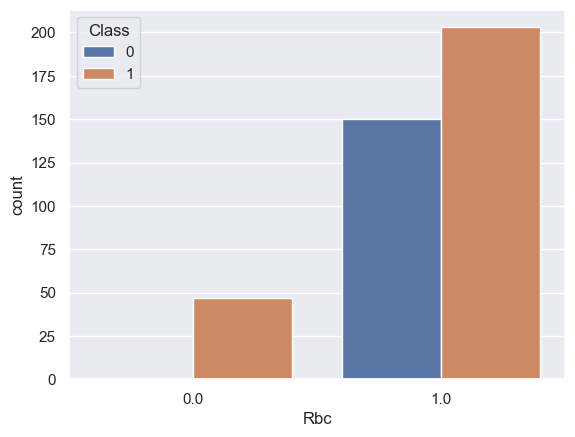

In [16]:
sns.countplot(data=df, x='Rbc', hue='Class')

<Axes: xlabel='Bp', ylabel='Count'>

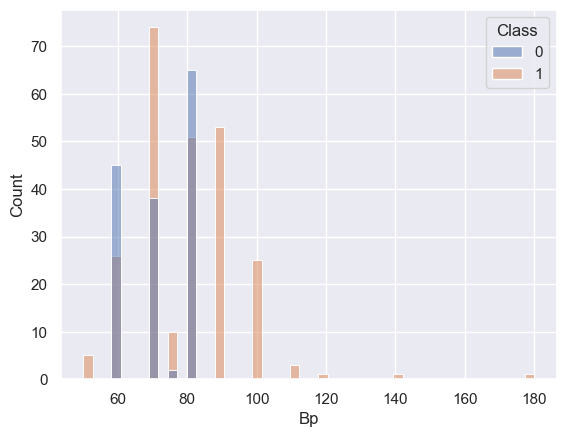

In [17]:
sns.histplot(data=df, x='Bp', hue="Class")

# Data preprocessing

In [20]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

# check the class label balance or not

Class
1    250
0    150
Name: count, dtype: int64

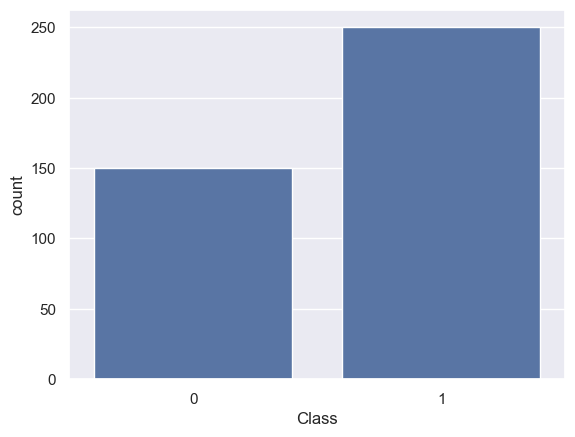

In [27]:
sns.countplot(x=df['Class'])
df.Class.value_counts()

# Oversampling Minority Class to Balance the Class label

In [29]:
from sklearn.utils import resample
df_majority = df[(df['Class'] == 1)]
df_minority = df[(df['Class'] == 0)]

df_minority_upsampled = resample(df_minority, n_samples=250, random_state=0)
df2 = pd.concat([df_minority_upsampled, df_majority])

Class
0    250
1    250
Name: count, dtype: int64

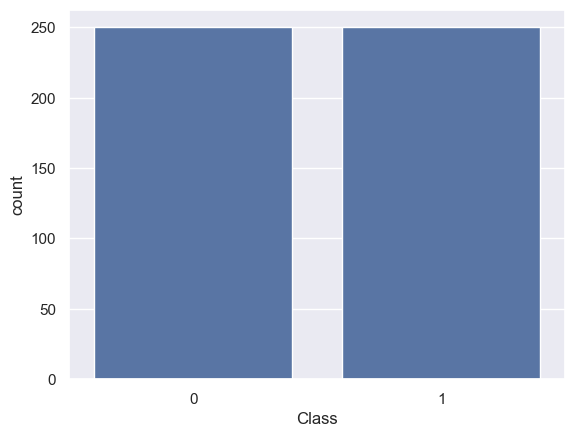

In [31]:
sns.countplot(x=df2['Class'])
df2.Class.value_counts()

# check the outlier using Boxplot

<Axes: xlabel='Bp'>

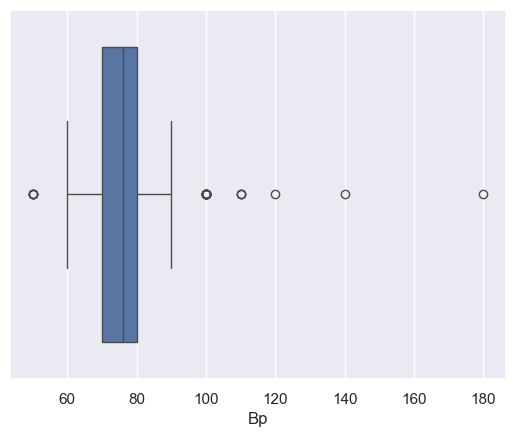

In [33]:
sns.boxplot(x=df2['Bp'])

<Axes: xlabel='Sg'>

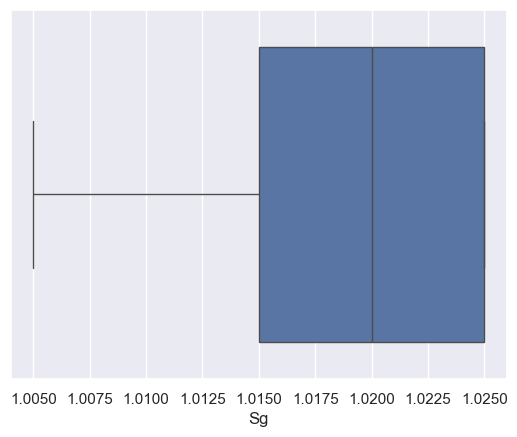

In [34]:
sns.boxplot(x=df2['Sg'])

<Axes: xlabel='Bu'>

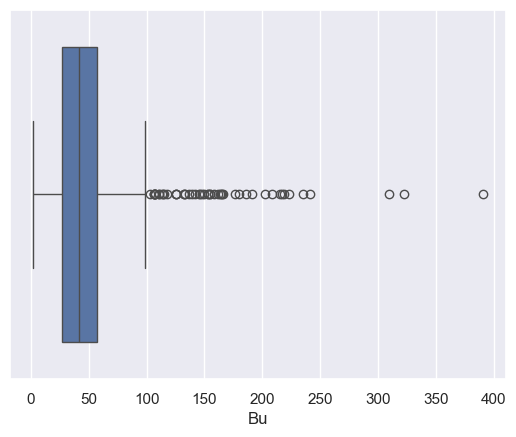

In [35]:
sns.boxplot(x=df2['Bu'])

<Axes: xlabel='Sc'>

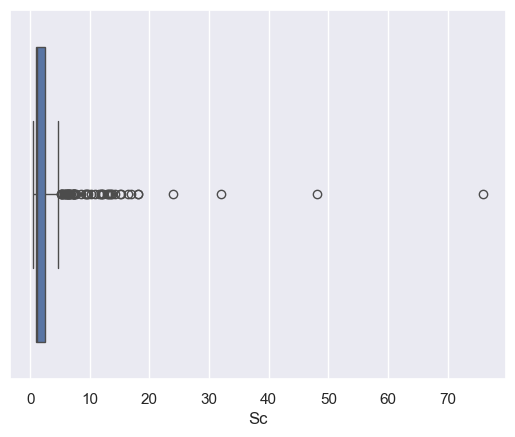

In [36]:
sns.boxplot(x=df2['Sc'])

<Axes: xlabel='Sod'>

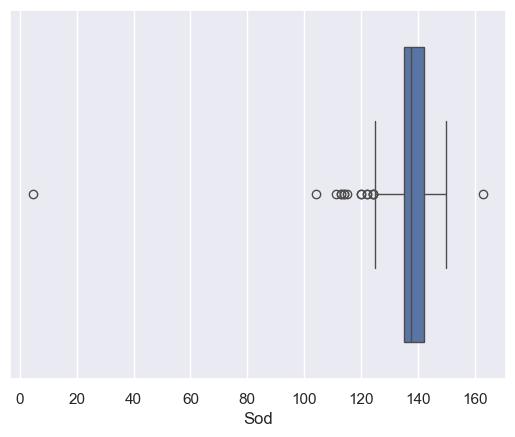

In [37]:
sns.boxplot(x=df2['Sod'])

<Axes: xlabel='Pot'>

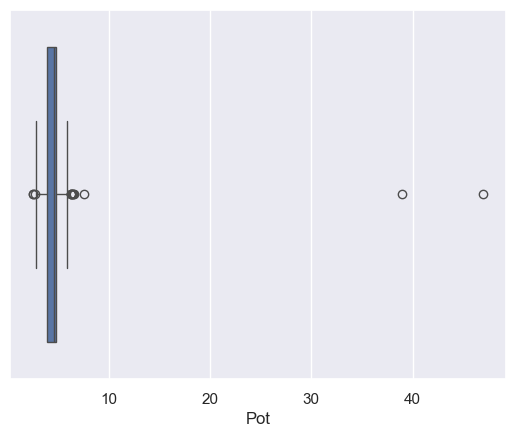

In [38]:
sns.boxplot(x=df2['Pot'])

<Axes: xlabel='Hemo'>

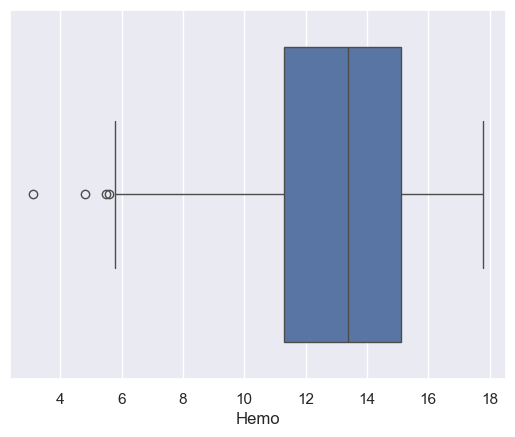

In [40]:
sns.boxplot(x=df2['Hemo'])

<Axes: xlabel='Wbcc'>

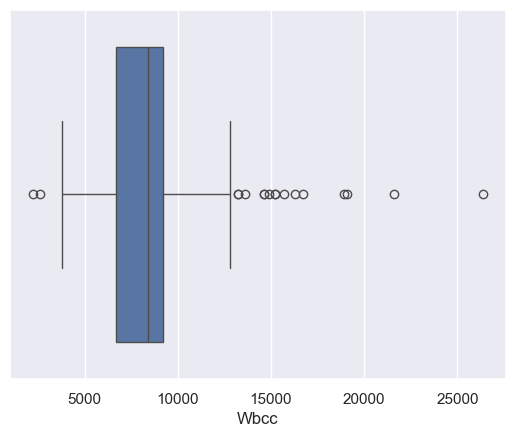

In [42]:
sns.boxplot(x=df2['Wbcc'])

<Axes: xlabel='Rbcc'>

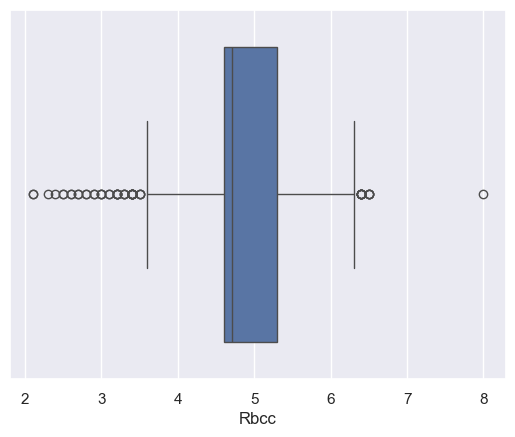

In [43]:
sns.boxplot(x=df2['Rbcc'])

# Remove outlier using Z-Score

In [47]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis=1)]
data_clean.shape


(420, 14)

# Heatmap Data Correlation

<Axes: >

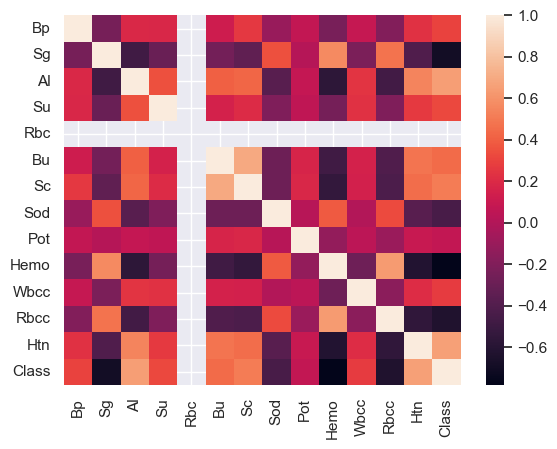

In [48]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [49]:
# Rbc attribute is irrlevent so we have to remove it
data_clean2 = data_clean.drop(columns=['Rbc'])

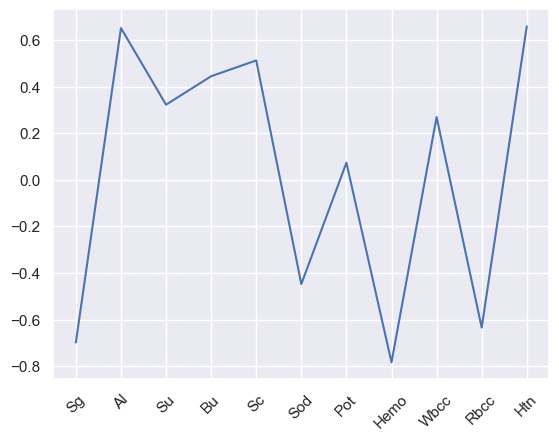

In [52]:
corr = data_clean2[data_clean2.columns[1:]].corr()['Class'][:-1]
plt.plot(corr)
plt.xticks(rotation=45)
plt.show()

# Mechine Learning Model Building

In [53]:
X = data_clean2.drop('Class', axis=1)
y = data_clean2['Class']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = rfc.predict(X_test)
print('Accurcy_Score:', round(accuracy_score(y_test,y_pred)*100,2), '%')

Accurcy_Score: 100.0 %


In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


Text(0.5, 1.0, 'Accuracy Score: 100.0')

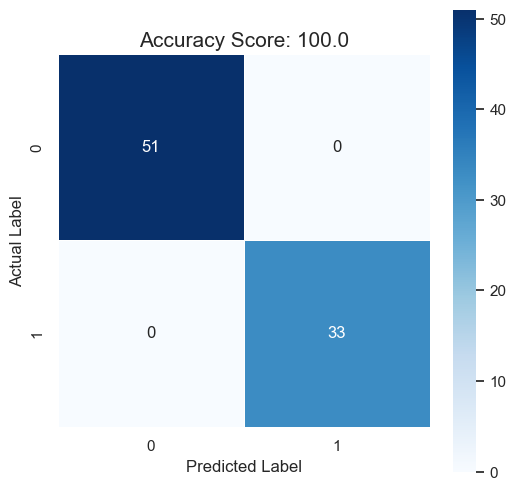

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
cm =  confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

# KNearset Neighbor Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
y_pred = knn.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 83.33 %


In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7586206896551724
Precision Score :  0.88
Recall Score :  0.6666666666666666


Text(0.5, 1.0, 'Accuracy Score: 83.33333333333334')

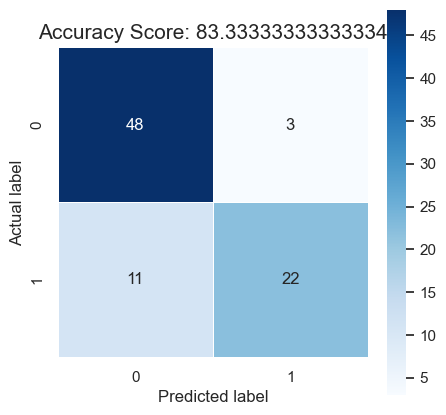

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

# AdaBoost Model

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=0)

In [67]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 100.0 %


In [68]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


Text(0.5, 1.0, 'Accuracy Score: 100.0')

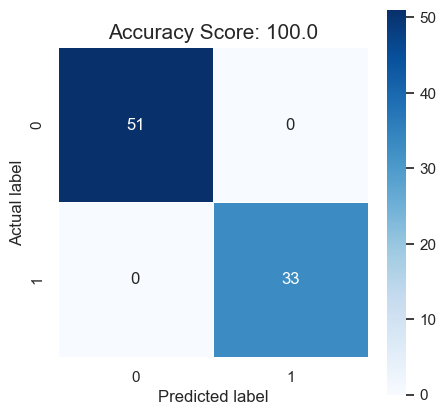

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(ada.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 100.0 %


In [73]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


Text(0.5, 1.0, 'Accuracy Score: 100.0')

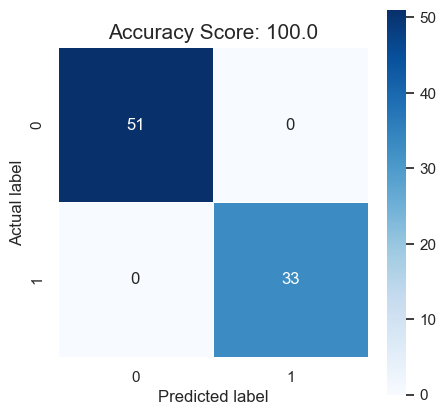

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)